# Question 1

To calculate the CDF, we integrate the PDF between α and x, as the PDF is defined as

$$
f(x) = \begin{cases}
      \frac{β α^β}{x^{β+1}} & \text{if } x \geq α \\
      0 & \text{otherwise}
\end{cases}
$$

$so ⇒$
where F(x) = CDF,
$$ F(x) = \int_{\alpha}^{x} \frac{\beta \alpha^\beta}{x^{\beta+1}} \,dx
$$

$$
= B \alpha^B \left[ \frac{1}{-B \alpha^B} \right] \Big|_{\alpha}^{x}
$$
$$
= 1- \Big(\frac{\alpha}{x}\Big)^β
$$

and the quantile function is defined as the inverse of the CDF: $F^{-1}(x)$, which can be calculated by subbing in $Q$ for $F$ and rearranging for x:

$$
Q = 1- \Big(\frac{\alpha}{x}\Big)^β
$$
$$
⇒ 1-Q = \Big(\frac{\alpha}{x}\Big)^β
$$
$$
⇒ (1-Q)^\frac{1}{β} = \frac{\alpha}{x}
$$
$$
⇒ x = \frac{\alpha}{(1-Q)^\frac{1}{\beta}}
$$
$$
⇒ F^{-1}(x) = \frac{\alpha}{(1-x)^\frac{1}{\beta}}
$$


# Question 2

The Expectation is defined as: $$\mathbb{E}[X] = \int_{-\infty}^{\infty} x \cdot f(x) \,dx $$


As $\mathbb{E}[X]$ is a linear-piecewise function, we only have to integrate between $\alpha$ and $∞$, when accounting for the conditions stated in the PDF above, as -∞ to $\alpha$ will be 0.

so ⇒ $$\mathbb{E}[X] = \int_{\alpha}^{\infty} x \cdot f(x) \,dx $$

$$
= β{α^β}\int_{α}^{\infty} x^{-β} \,dx
$$
$$
⇒ \mathbb{E}[X] = \frac{\beta\alpha}{\beta - 1}
$$

We now compute $\mathbb{E}[X^2]$, so that we can later calculate the variance.
$$
\mathbb{E}[X^2] = \int_{\alpha}^{\infty} x^2 \cdot f(x) \,dx
$$
$$
\mathbb{E}[X^2] = \frac{βα^2}{β-2}
$$

Now, $\mathbb{Var}[X] = \mathbb{E}[X^2] - (\mathbb{E}[X])^2$
$$
\mathbb{Var}[X] = \frac{βα^2}{β-2} - \Big(\frac{\beta\alpha}{\beta - 1}\Big)^2
$$
$$
= \frac{βα^2}{(\beta -1)^2 (\beta -2)}
$$


# Question 3



Let $(X_1, X_2, \ldots, X_n)$ be a sequence of i.i.d random variables from the same distribution as X.

The sample mean $\bar{X}$ is defined as:

$ \bar{X} = \frac{1}{n} \sum_{i=1}^{n} X_i $

The expectation of the sample mean is then given by:

$ E(\bar{X}) = E\left(\frac{1}{n} \sum_{i=1}^{n} X_i\right) $

By linearity:

$ E(\bar{X}) = \frac{1}{n} \sum_{i=1}^{n} E(X_i) $



Now, we can simplify the expression:

$ E(\bar{X}) = \frac{1}{n} \cdot n \cdot E(X) $

Canceling out $n$ from the numerator and denominator, we get:

$ E(\bar{X}) = E(X) = \frac{βα}{β-1}$



Now the for the variance of the sample mean:

Since the $X_i$ are assumed to be independent and identically distributed (i.i.d.), we can assume there is no covariance between the individual observations. So we can simply express the variance as, ingoring any covariance terms:

$\text{Var}(\bar{X}) = \frac{1}{n^2} \sum_{i=1}^{n} \text{Var}(X_i)$



Simplifying, we get:

$\text{Var}(\bar{X}) = \frac{Var(X)}{n} $

As the sample size $n$ goes to infinity, the expectation tends to the population mean, $\mu$

$\lim_{{n \to \infty}} E(\bar{X}) = \mu $

This result is a consequence of the Law of Large Numbers, which states that as the sample size increases, the sample mean converges in probability to the population mean.

On the other hand, as the sample size n goes to infinity, the variance of the sample mean $\bar{X}$ approaches zero.

$\lim_{{n \to \infty}} \text{Var}(\bar{X}) = 0 $

This is a reflection of the fact that as the sample size becomes larger, the sample mean becomes a more precise estimate of the population mean, and the variability of the sample mean decreases.



# Question 4

Creating a function called gen_X, that takes α, β and n as inputs and outputs a sample $X_1$, $X_2$...$X_n$ of $X$

I have done this using a method called [inverse transfrom sampling](https://en.wikipedia.org/wiki/Inverse_transform_sampling#:~:text=Computationally%2C%20this%20method%20involves%20computing,and%20then%20inverting%20that%20function.), whereby  random samples are generated from the desired probability distribution by transforming uniform random variables through the inverse of the cumulative distribution function (CDF) (also known as the Quantile Function) of the target distribution; which I already derived in Q1.

In [ ]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

import numpy as np

def gen_X(n, a, B):
    def inverse_cdf(x):
        return a / ((1 - x) ** (1/B))

    u = np.random.uniform(0, 1, n)
    random_variables = inverse_cdf(u)
    return random_variables



# Question 5

In this question I initially generate a list containing 1000 entries of $\bar{X}$. I use my gen_X function within this function to generate 50000 random samples, 1000 times.

I then use the numpy.percentile package, to create a function which will calculate the quantiles as requested.
The quantiles are plotted, q as a function of t. Where q is the sample quantile and t is the mapping function.

I then further plot the curve representing the Cummulative Distribution Function, in which values are calculated using the E(X) and Var(X), I calculated in Q's 2 and 3.

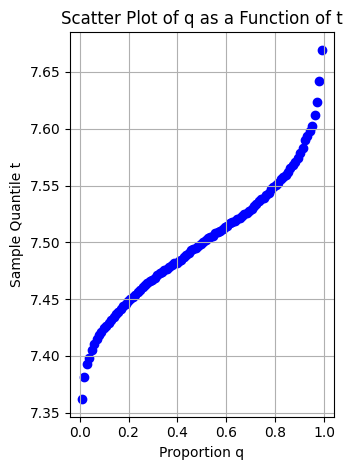

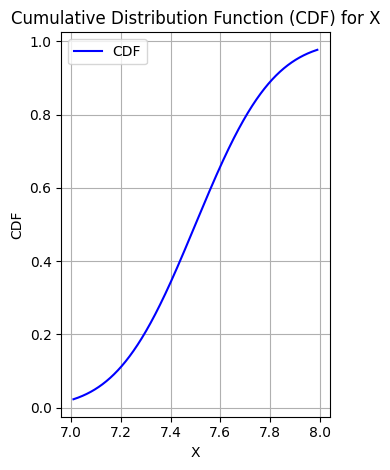

In [ ]:
# function for generating the list of sample means, for the desired list length. In this case will be 1000.
def generate_sample_means(sample_size, num_samples, a, B):
    sample_means = []

    for _ in range(num_samples):
        # Generate a sample of size 'sample_size'
        sample = gen_X(sample_size, a, B)

        # Compute the mean of the sample
        sample_mean = np.mean(sample)

        # Append the sample mean to the list
        sample_means.append(sample_mean)

    return sample_means

# function to generate the sample quantile
def calculate_quantile(sample, q):
    return np.percentile(sample, q * 100)

# Implementation
a = 5
B = 3
sample_size = 5000
num_samples = 1000

# Generate 1000 sample means, each calculated from a sample_size of 5000.
sample_means = generate_sample_means(sample_size, num_samples, a, B)

# Calculate quantiles for various values of q
quantiles = np.linspace(0.01, 0.99, 100)  # Choose desired values of q between 0.01 and 0.99
quantile_values = [calculate_quantile(sample_means, q) for q in quantiles]

# Corrected expressions for E(X) and sqrt(Var(X)/n)
mean_distribution = a*B / (B - 1)  # Corrected expression for E(X)
std_dev_distribution = np.sqrt((B*a**2/(B-2)*(B-1)**2) / sample_size)  # Corrected expression for sqrt(Var(X)/n)

# Generate values for the x-axis based on the normal distribution
x_values = np.linspace(mean_distribution - 2 * std_dev_distribution, mean_distribution + 2 * std_dev_distribution, 1000)

# Calculate the cumulative distribution function (CDF) for the normal distribution
cdf_values = norm.cdf(x_values, loc=mean_distribution, scale=std_dev_distribution)


# Create a scatter plot
plt.subplot(1,2,1)
plt.scatter(quantiles, quantile_values, color='blue', marker='o')
plt.title('Scatter Plot of q as a Function of t')
plt.xlabel('Proportion q')
plt.ylabel('Sample Quantile t')
plt.grid(True)
plt.tight_layout()
plt.show()



# Plot the cumulative distribution function
plt.subplot(1,2,2)
plt.plot(x_values, cdf_values, color='blue', label='CDF')
plt.title('Cumulative Distribution Function (CDF) for X')
plt.xlabel('X')
plt.ylabel('CDF')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

The Scatter plot and the Curve are the inverse of one another. This is because when calculating the quantile function mathematically, you find the inverse of the CDF. In this case the CDF, is the same CDF used to find the quantile function, as we generate samples based on the Probability density function listed in the question, and the CDF was derived from this. Hence, the two plots are the inverse of one another.

# Question 6



### Likelihood Function:

 The likelihood function is given by the product of the individual probability density functions:

$ L(a, B \,|\, x_1, x_2, \ldots, x_n) = \prod_{i=1}^{n} \frac{Ba^B}{x_i^{B+1}} =  {\beta}^n {\alpha}^{\beta n} \prod_{i=1}^{n} \frac{1}{{x_i}^{\beta + 1}} $



### Log-Likelihood Function:





$ \ell(\alpha, \beta \,|\, x_1, x_2, \ldots, x_n) = n\log(\beta) + \beta n\log(\alpha) - (\beta+1) \sum_{i=1}^{n} \log(x_i) $



### MLE for $\beta$:

$ \frac{\delta \ell}{\delta \beta}= \frac{n}{\beta} +n \log(\alpha) - \sum_{i=1}^{n} \log(x_i) = 0$

$ ⇒\beta_{MLE} = \frac{n}{\sum_{i=1}^{n} \log(x_i) -n \log(\alpha) } $



# Question 7
In this question I am investigating the bias and consistency of using $β_{MLE}$ as an estimator for β. I do this by generating a series of random variables using my pre-defined gen_X function, for each value of n mentioned in the question. I use my log-likelihood expression that I derived in question 6 and negate it for neg-loglikelihood, so that I can then use the scipy.optimize package to minimise the expression. This is so that I can account for any human error in my previous calculations. I plot the results of the simulation as the Bias $β_{MLE}$ of vs increasing values for n.

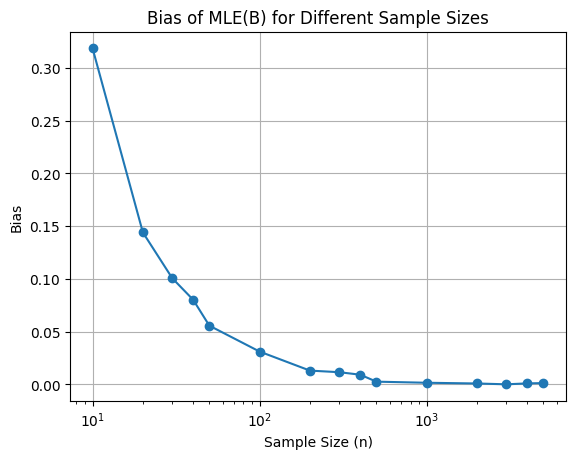

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# Original function
def gen_X(n, a, B):
    def inverse_cdf(x):
        return a / ((1 - x) ** (1/B))

    u = np.random.uniform(0, 1, n)
    random_variables = inverse_cdf(u)
    return random_variables

def log_likelihood(B, a, data):
    return -np.sum(np.log(B) + B * np.log(a) - (B + 1) * np.log(data))

# Function to compute the bias
def compute_bias(true_value, estimates):
    return np.mean(estimates) - true_value

# Function to perform the simulation study
def simulation_study(true_a, true_B, sample_sizes, num_trials):
    biases = []

    for n in sample_sizes:
        mle_estimates = []

        for _ in range(num_trials):
            data = gen_X(n, true_a, true_B)

            # Initial guess for B
            initial_guess_B = 1.0

            # Perform the optimization to find the MLE for B
            result = minimize(log_likelihood, initial_guess_B, args=(true_a, data), method='L-BFGS-B')

            # Extract the MLE for B from the optimization result
            mle_B = result.x[0]
            mle_estimates.append(mle_B)

        # Compute the bias and store it
        true_value = true_B
        bias = compute_bias(true_value, mle_estimates)
        biases.append(bias)

    return biases

# Parameters
true_a = 5
true_B = 3
sample_sizes = [10, 20, 30, 40, 50, 100, 200, 300, 400, 500, 1000, 2000, 3000, 4000, 5000]
num_trials = 5000

# Perform the simulation study
biases = simulation_study(true_a, true_B, sample_sizes, num_trials)

# Plot bias against sample size
plt.plot(sample_sizes, biases, marker='o')
plt.xscale('log')  # Set x-axis to log scale for better visualization
plt.xlabel('Sample Size (n)')
plt.ylabel('Bias')
plt.title('Bias of MLE(B) for Different Sample Sizes')
plt.grid(True)
plt.show()


As shown by the above graph we see a downward curve for the Bias as the value, n, of samples increases. The Bias of an estimator is defined as:

$\text{Bias}(\hat{\theta}) = \mathbb{E}(\hat{\theta}) - \theta
$

and an estimator is said to be unbiased if $\text{Bias}(\hat{\theta}) = 0
$

In the case of my above simulation, $\hat{\theta} = B_{MLE}
$ and $ \theta = B$.

From the above plot it can be said that $\textbf{the estimator is biased}$. Although, it eventually tends to 0 it does not oscillate around 0 as would be expected from an unbiased estimator. We can further say, that as a consequence of the Law of Large Numbers, $\textbf{the estimator is consistent}$. This is because, as the value of n increases the bias tends to 0 and an estimator is considered consistent if it convereges to the population parameter as $n → {∞}$.
